In [10]:
!pip install qiskit --quiet
!pip install qiskit-aer --quiet

In [11]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector
from IPython.display import display

sim = AerSimulator()



Task 1: Single-Qubit Hadamard Transformations-Predict the statevector after H on |0>, |1>, |+>, |->.
--- |0> ---
Statevector after H: [0.70710678+0.j 0.70710678+0.j]


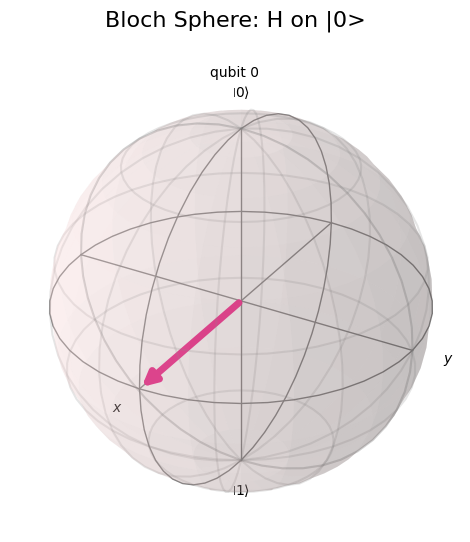

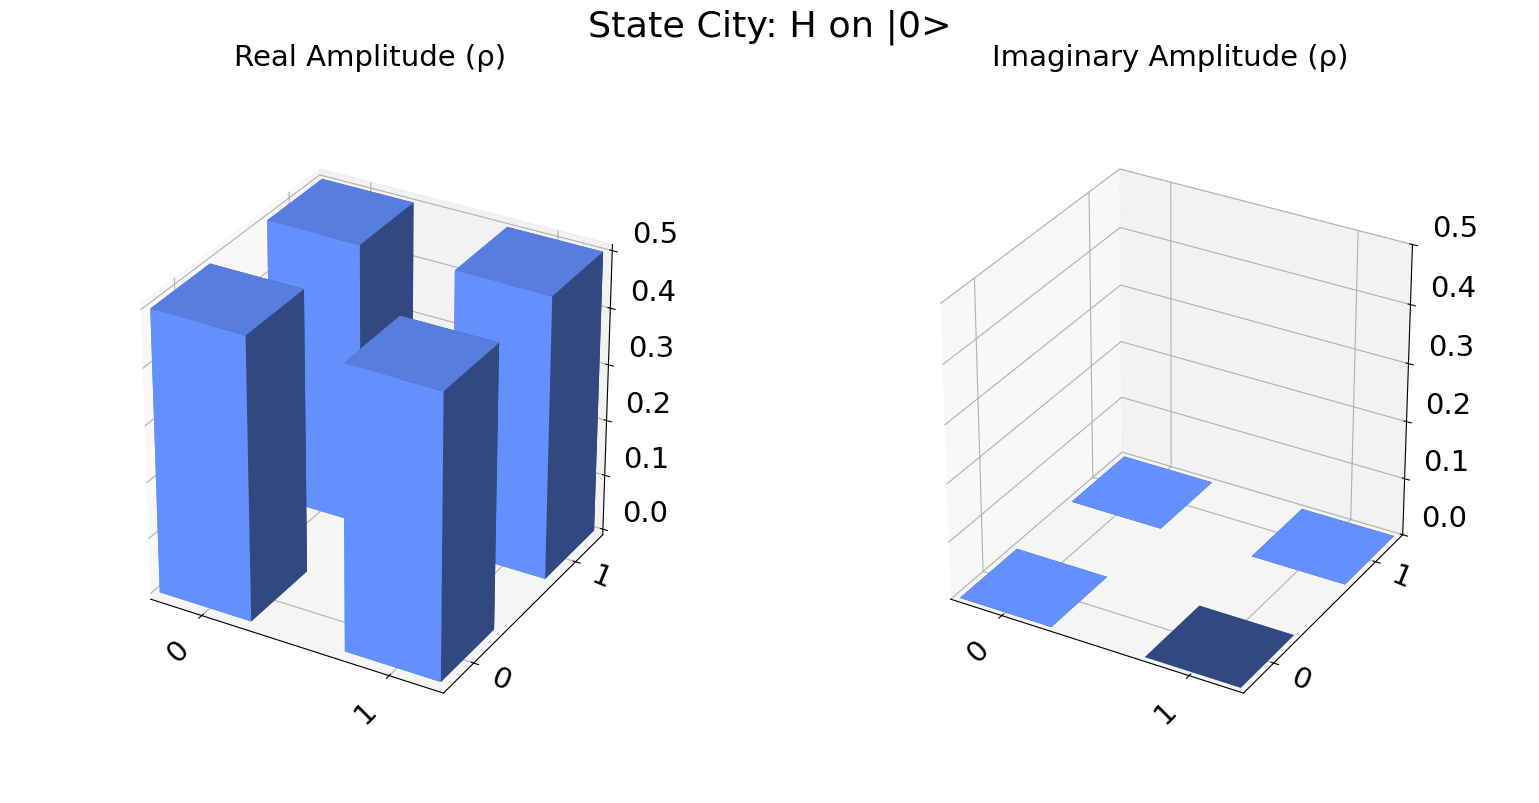

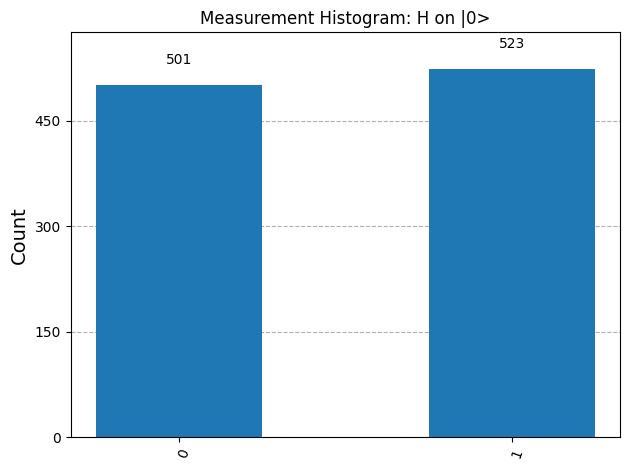



--- |1> ---
Statevector after H: [ 0.70710678+0.j -0.70710678+0.j]


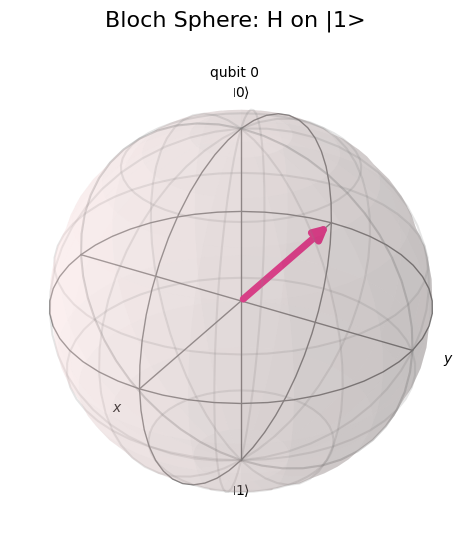

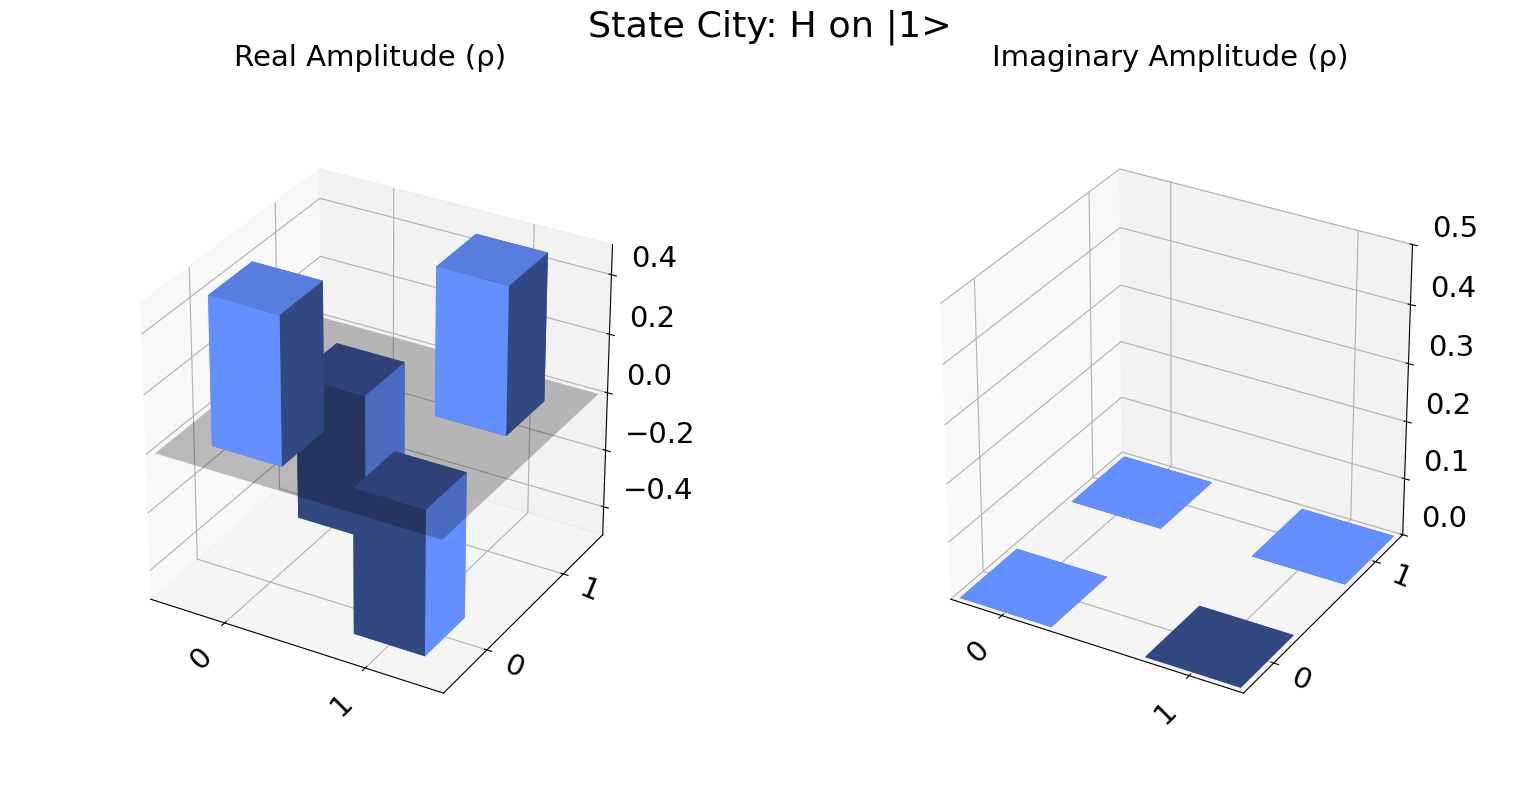

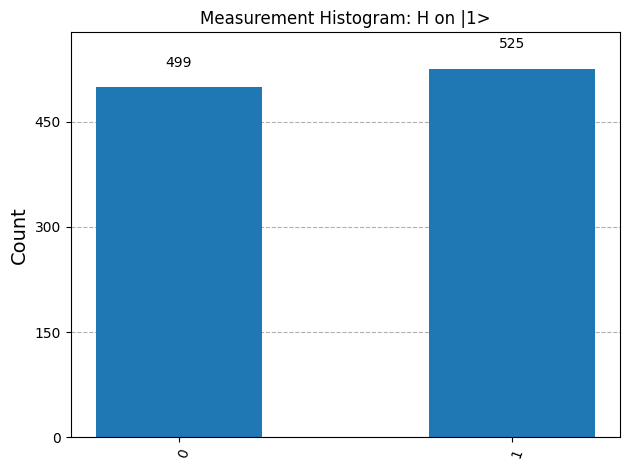



--- |+> ---
Statevector after H: [1.+0.j 0.+0.j]


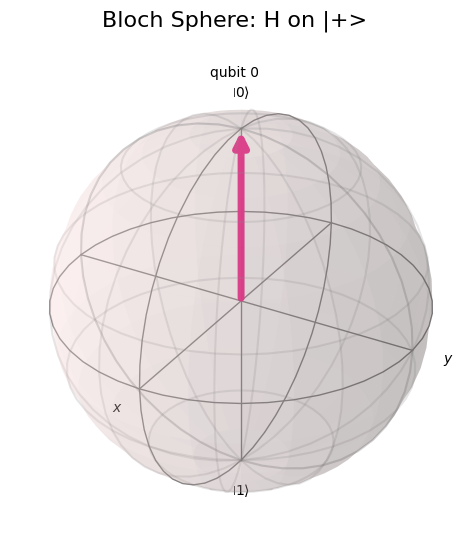

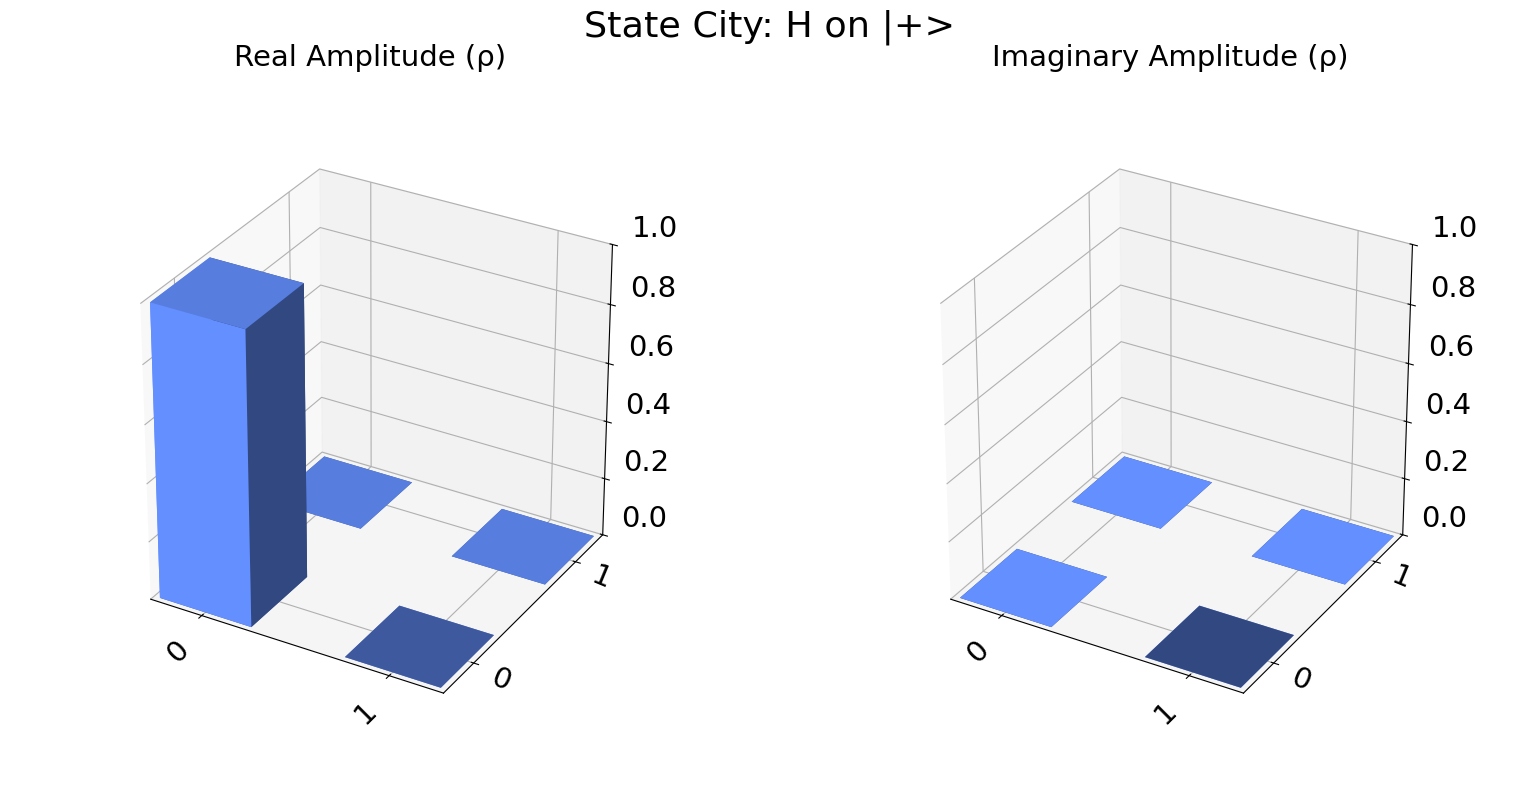

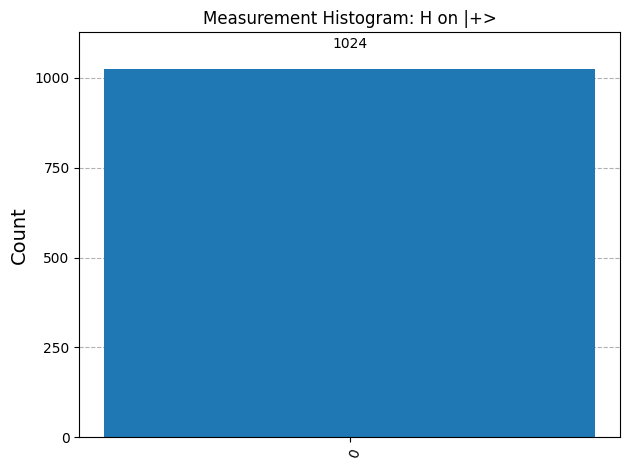



--- |-> ---
Statevector after H: [0.+0.j 1.+0.j]


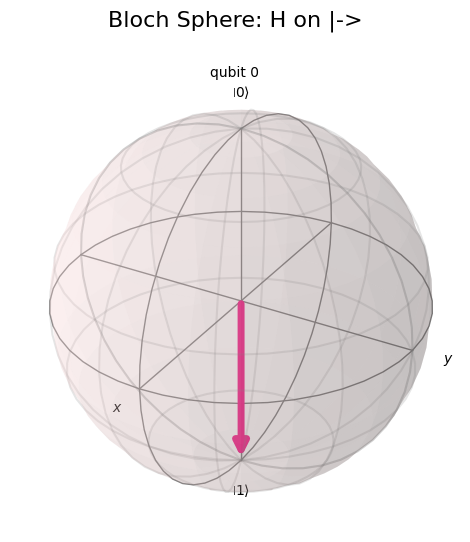

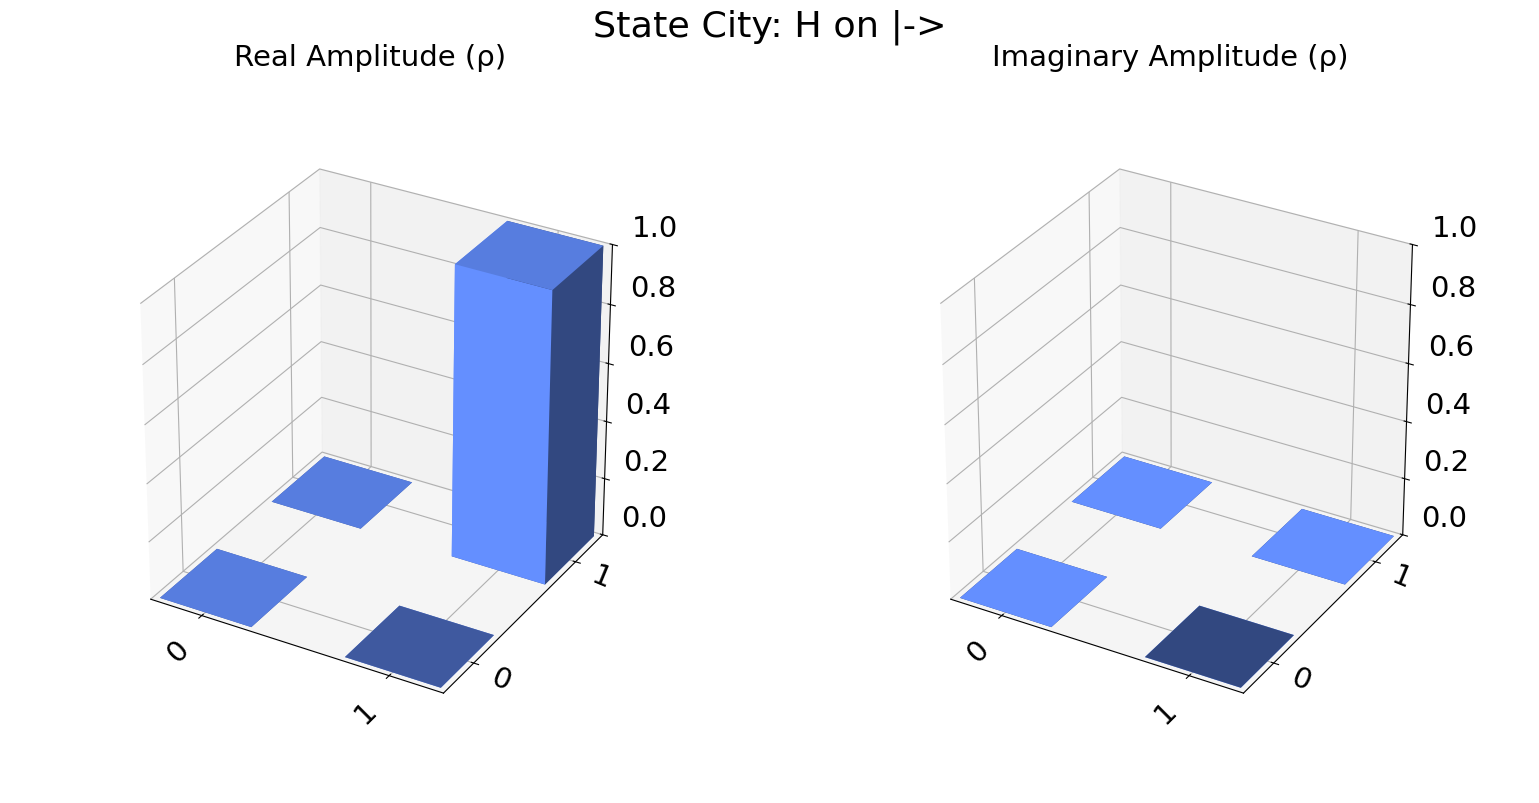

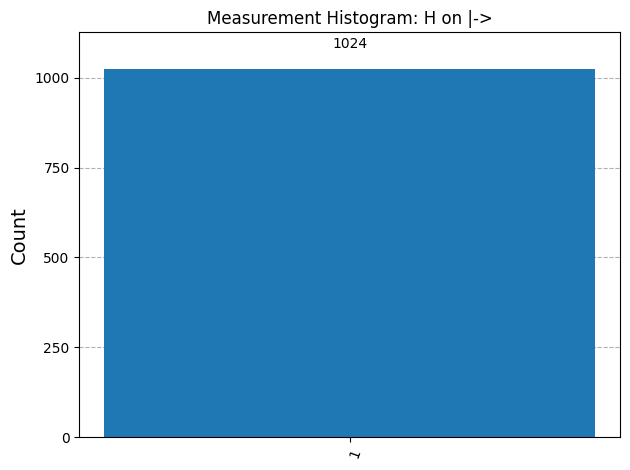

In [17]:
print("\nTask 1: Single-Qubit Hadamard Transformations-Predict the statevector after H on |0>, |1>, |+>, |->.")

def visualize_hadamard(init_state_vector, label):
    """
    Applies Hadamard to a single-qubit initial state and visualizes results.
    """
    qc = QuantumCircuit(1, 1)
    qc.initialize(init_state_vector, 0)
    qc.h(0)
    qc.measure(0, 0)

    # Statevector after Hadamard
    qc_state = QuantumCircuit(1)
    qc_state.initialize(init_state_vector, 0)
    qc_state.h(0)
    state_after = Statevector.from_instruction(qc_state)

    print(f"--- {label} ---")
    print("Statevector after H:", state_after.data)

    display(plot_bloch_multivector(state_after, title=f"Bloch Sphere: H on {label}"))
    display(plot_state_city(state_after, title=f"State City: H on {label}"))

    # Simulation
    qc_t = transpile(qc, sim)
    result = sim.run(qc_t, shots=1024).result()
    counts = result.get_counts()
    display(plot_histogram(counts, title=f"Measurement Histogram: H on {label}"))
    print("\n")

# |0>
visualize_hadamard(np.array([1, 0]), "|0>")   # expected (|0>+|1>)/√2

# |1>
visualize_hadamard(np.array([0, 1]), "|1>")   # expected (|0>-|1>)/√2

# |+>
visualize_hadamard(np.array([1/np.sqrt(2), 1/np.sqrt(2)]), "|+>")   # expected |0>

# |->
visualize_hadamard(np.array([1/np.sqrt(2), -1/np.sqrt(2)]), "|->")  # expected |1>



Task 2: Three-Qubit H⊗H⊗H
--- Task 2: H⊗H⊗H on |000> ---
Statevector amplitudes:
 |000> : (0.3535533905932737+0j)
 |001> : (0.3535533905932737+0j)
 |010> : (0.3535533905932737+0j)
 |011> : (0.3535533905932737+0j)
 |100> : (0.3535533905932737+0j)
 |101> : (0.3535533905932737+0j)
 |110> : (0.3535533905932737+0j)
 |111> : (0.3535533905932737+0j)


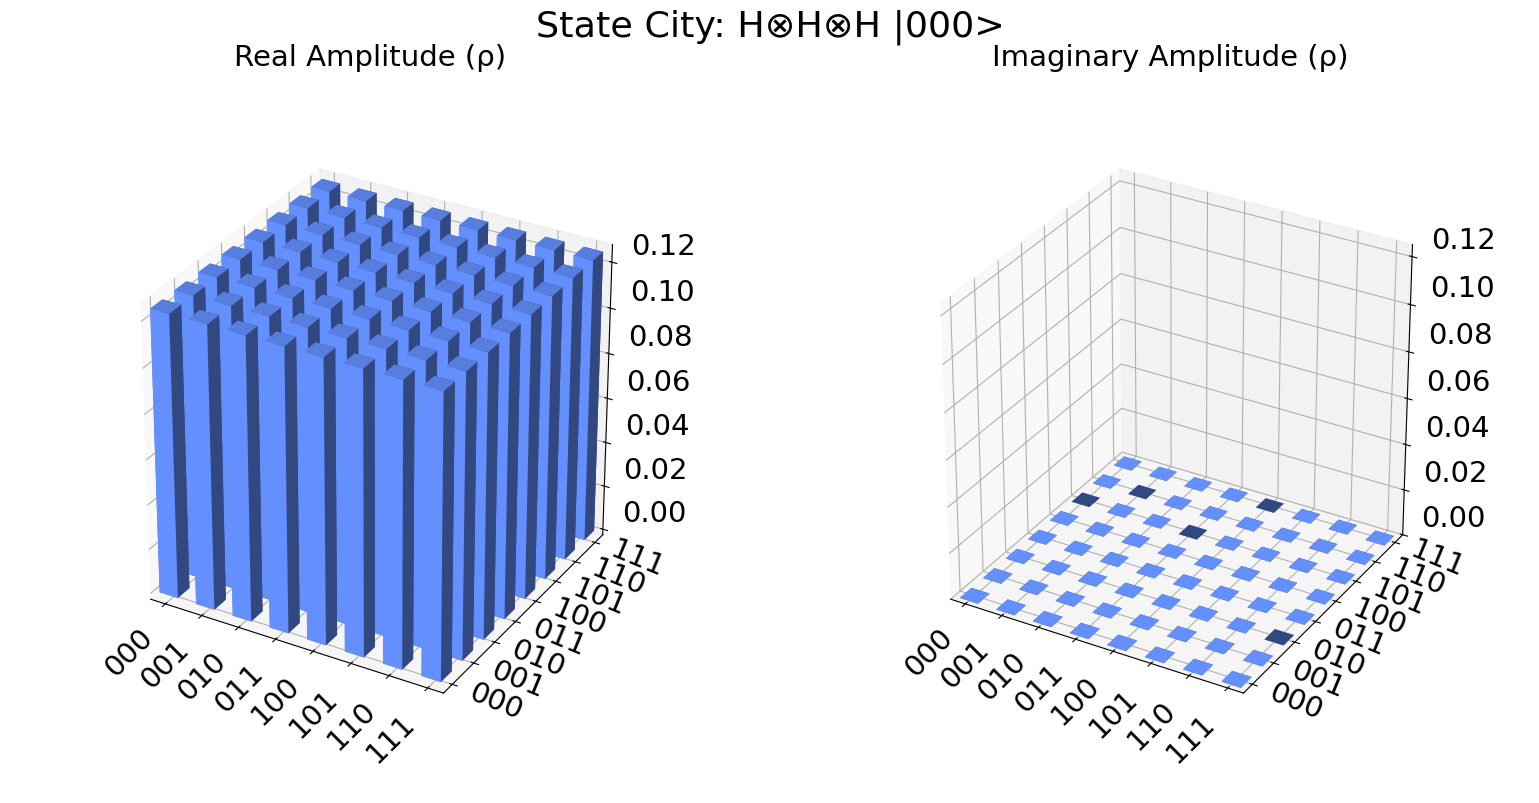

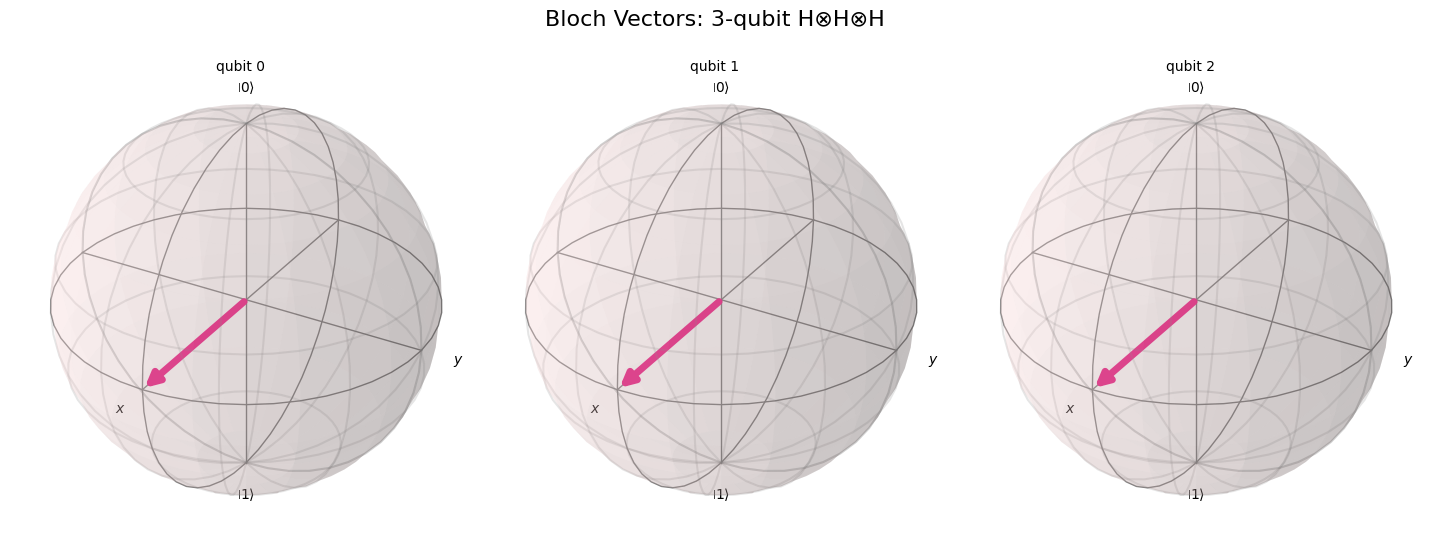

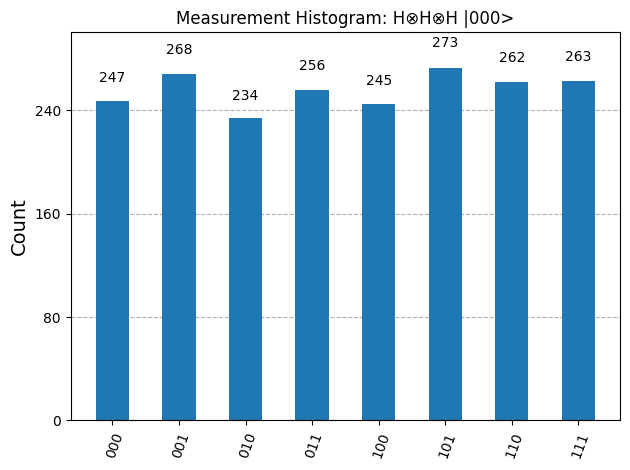


Analytical: All 8 basis states appear with equal probability 1/8 ≈ 0.125


In [13]:
print("\nTask 2: Three-Qubit H⊗H⊗H")


qc3 = QuantumCircuit(3, 3)
qc3.h([0, 1, 2])
qc3.measure([0, 1, 2], [0, 1, 2])

# Statevector before measurement
qc3_state = QuantumCircuit(3)
qc3_state.h([0, 1, 2])
state3 = Statevector.from_instruction(qc3_state)

print("--- Task 2: H⊗H⊗H on |000> ---")
print("Statevector amplitudes:")
for idx, amp in enumerate(state3.data):
    print(f" |{idx:03b}> : {amp}")

display(plot_state_city(state3, title="State City: H⊗H⊗H |000>"))
display(plot_bloch_multivector(state3, title="Bloch Vectors: 3-qubit H⊗H⊗H"))

# Simulation
qc3_t = transpile(qc3, sim)
result3 = sim.run(qc3_t, shots=2048).result()
counts3 = result3.get_counts()
display(plot_histogram(counts3, title="Measurement Histogram: H⊗H⊗H |000>"))

print("\nAnalytical: All 8 basis states appear with equal probability 1/8 ≈ 0.125")



Task 3: H + CX + CX on 3 Qubits (GHZ state)
--- Task 3: GHZ-like state (H + CX + CX) ---
Statevector amplitudes:
 |000> : (0.7071067811865475+0j)
 |001> : 0j
 |010> : 0j
 |011> : 0j
 |100> : 0j
 |101> : 0j
 |110> : 0j
 |111> : (0.7071067811865475+0j)


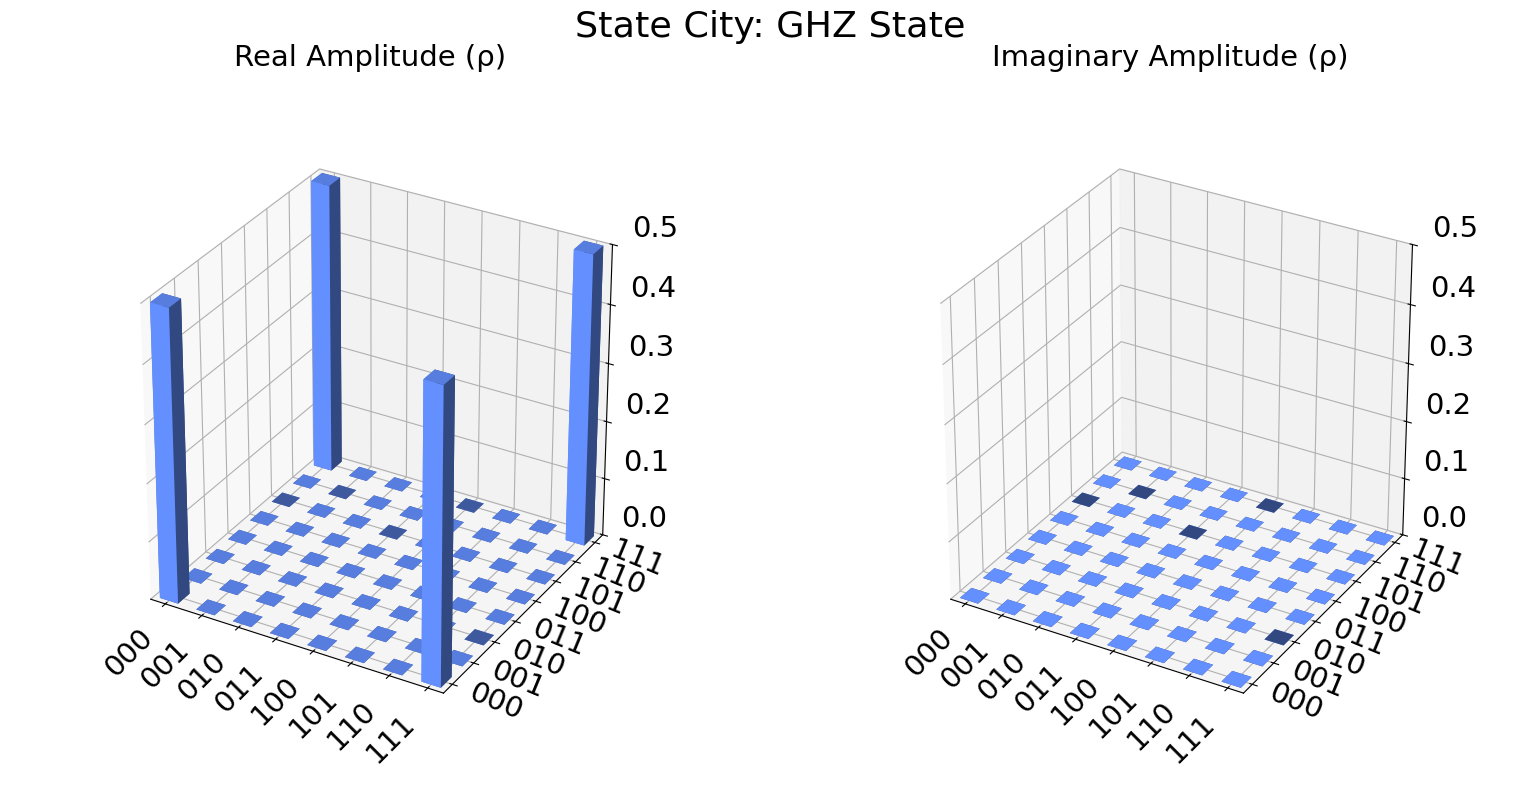

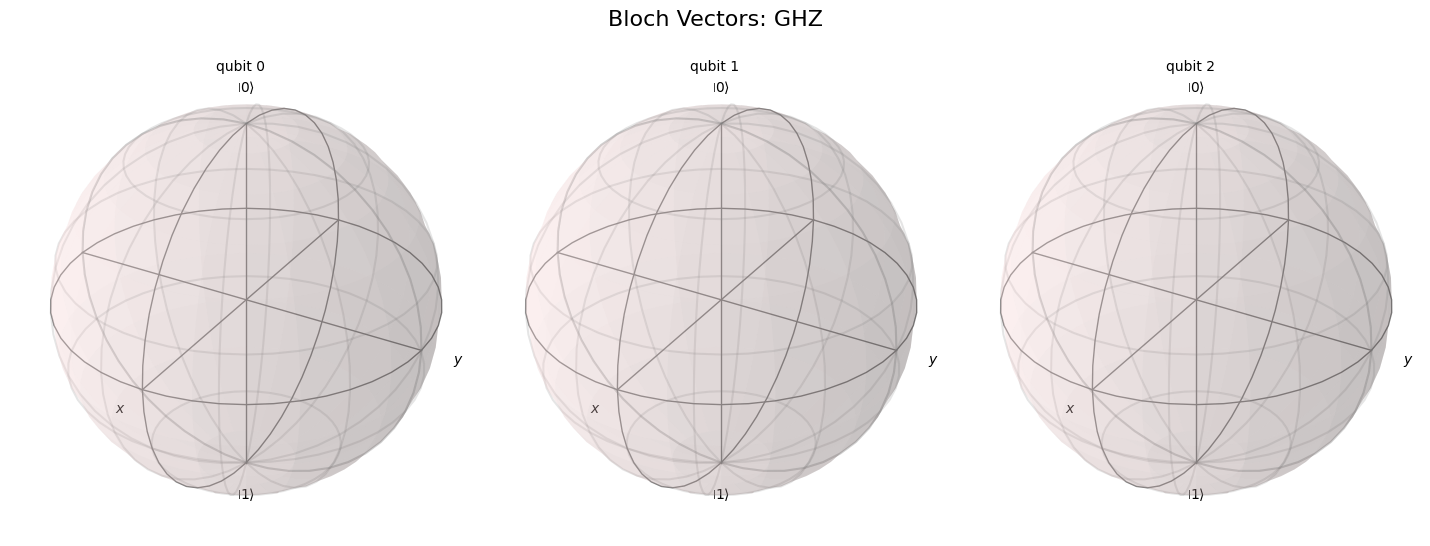

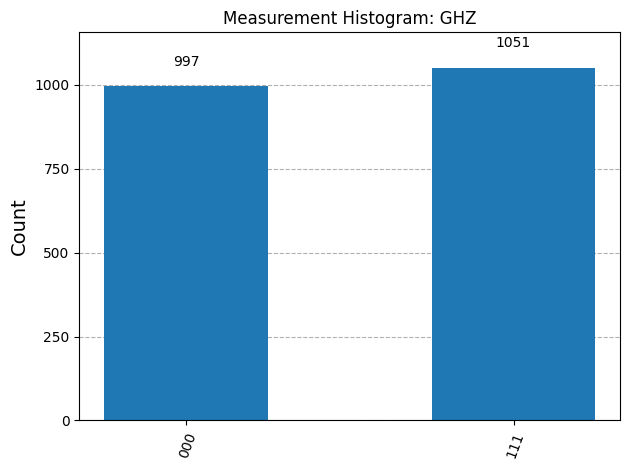


Analytical: Only |000> and |111> occur, each with probability 1/2.
Perfect 3-qubit correlations.



In [14]:
print("\nTask 3: H + CX + CX on 3 Qubits (GHZ state)")

qc_ghz = QuantumCircuit(3, 3)
qc_ghz.h(0)
qc_ghz.cx(0, 1)
qc_ghz.cx(0, 2)
qc_ghz.measure([0, 1, 2], [0, 1, 2])

# Statevector before measurement
qc_ghz_state = QuantumCircuit(3)
qc_ghz_state.h(0)
qc_ghz_state.cx(0, 1)
qc_ghz_state.cx(0, 2)
state_ghz = Statevector.from_instruction(qc_ghz_state)

print("--- Task 3: GHZ-like state (H + CX + CX) ---")
print("Statevector amplitudes:")
for idx, amp in enumerate(state_ghz.data):
    print(f" |{idx:03b}> : {amp}")

display(plot_state_city(state_ghz, title="State City: GHZ State"))
display(plot_bloch_multivector(state_ghz, title="Bloch Vectors: GHZ"))

# Simulation
qc_ghz_t = transpile(qc_ghz, sim)
result_ghz = sim.run(qc_ghz_t, shots=2048).result()
counts_ghz = result_ghz.get_counts()
display(plot_histogram(counts_ghz, title="Measurement Histogram: GHZ"))

print("\nAnalytical: Only |000> and |111> occur, each with probability 1/2.")
print("Perfect 3-qubit correlations.\n")



Task 4: Apply H Twice on |1>
--- Task 4: H twice on |1> ---
Statevector after H then H: [0.+0.j 1.+0.j]


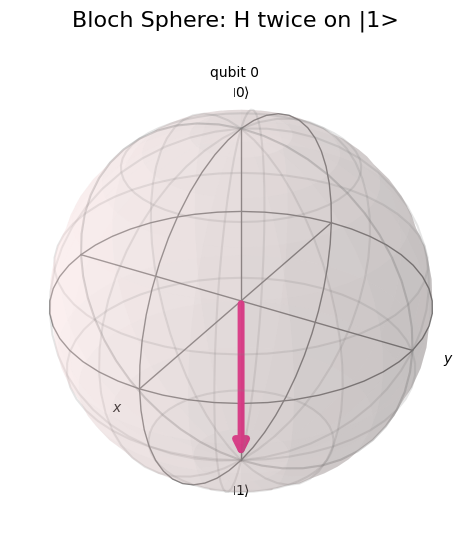

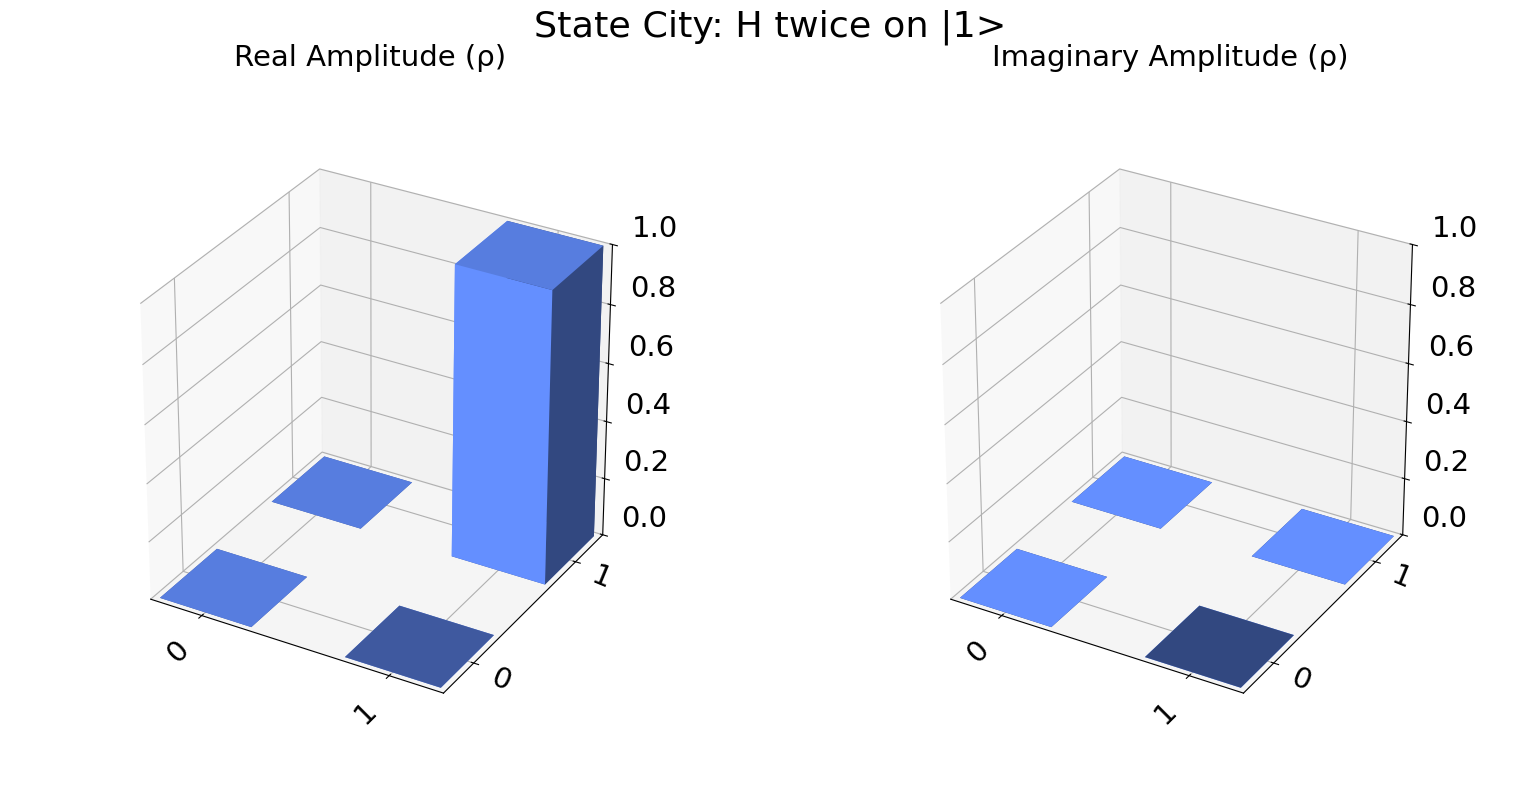


Expected: The state returns exactly to |1> ([0, 1]) because H·H = I



In [15]:
print("\nTask 4: Apply H Twice on |1>")


qc_h2 = QuantumCircuit(1)
qc_h2.initialize([0, 1], 0)  # Start with |1>
qc_h2.h(0)
qc_h2.h(0)

state_h2 = Statevector.from_instruction(qc_h2)

print("--- Task 4: H twice on |1> ---")
print("Statevector after H then H:", state_h2.data)

display(plot_bloch_multivector(state_h2, title="Bloch Sphere: H twice on |1>"))
display(plot_state_city(state_h2, title="State City: H twice on |1>"))

print("\nExpected: The state returns exactly to |1> ([0, 1]) because H·H = I\n")



Task 5: Observe Qubit Rotations After Hadamard Gate

--- |0> ---
Before Hadamard: [1.+0.j 0.+0.j]


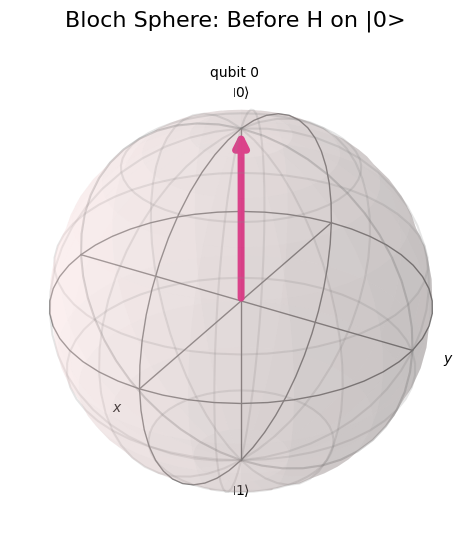

After Hadamard: [0.707+0.j 0.707+0.j]


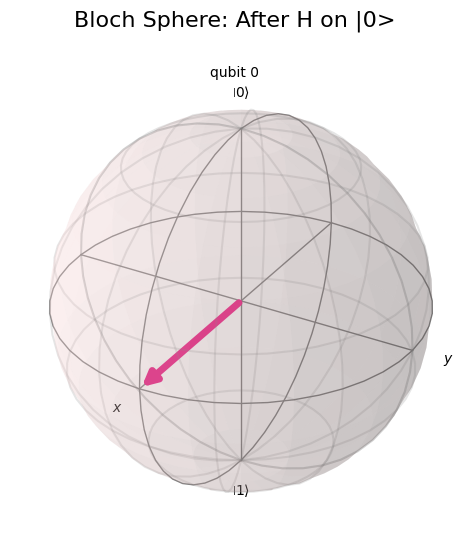


--- |1> ---
Before Hadamard: [0.+0.j 1.+0.j]


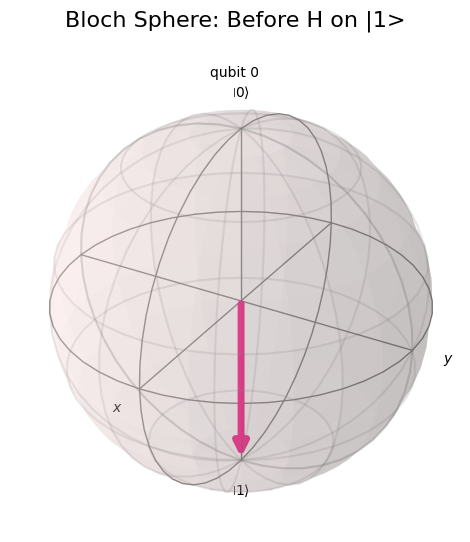

After Hadamard: [ 0.707+0.j -0.707+0.j]


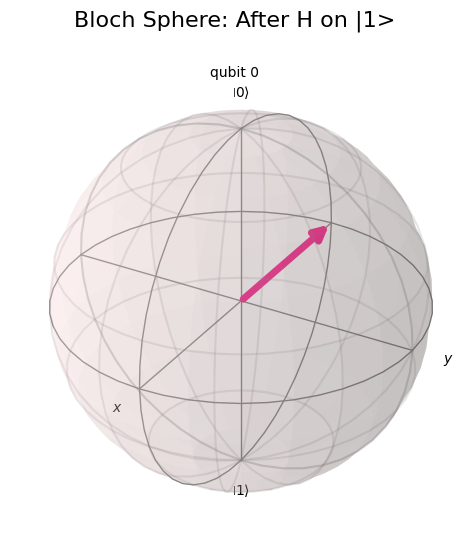


--- |+> ---
Before Hadamard: [0.707+0.j 0.707+0.j]


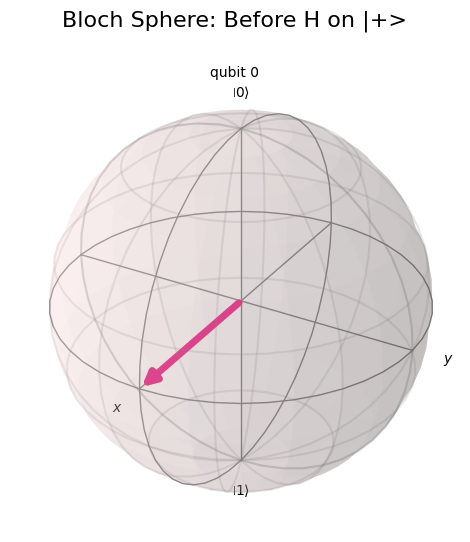

After Hadamard: [1.+0.j 0.+0.j]


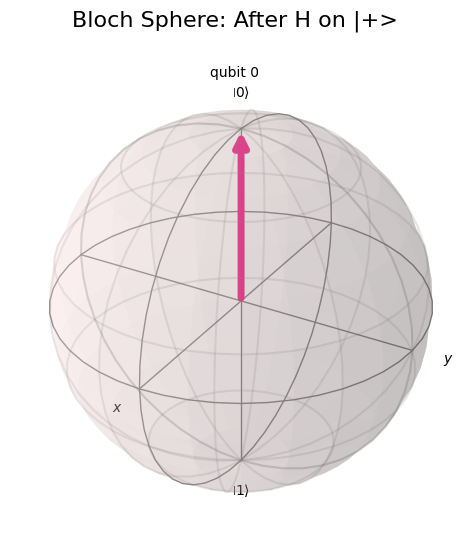


--- |-> ---
Before Hadamard: [ 0.707+0.j -0.707+0.j]


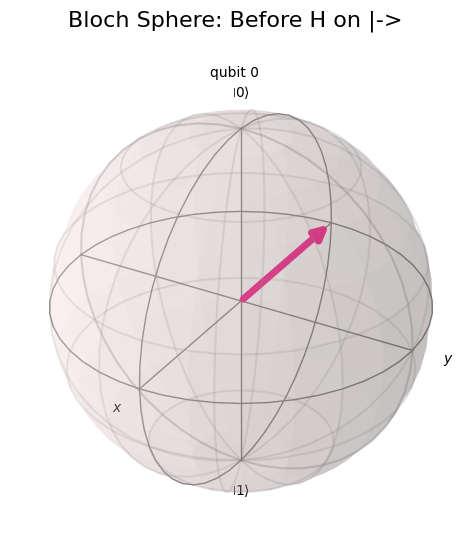

After Hadamard: [0.+0.j 1.+0.j]


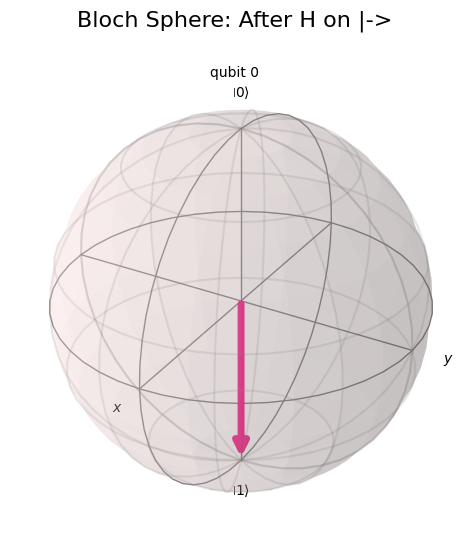


Observation:
The Hadamard gate rotates the qubit such that:
 - |0> (north pole, Z+) becomes |+> (X+ direction).
 - |1> (south pole, Z-) becomes |-> (X− direction).
 - |+> returns to |0>, and |-> returns to |1> (since H² = I).


In [16]:
print("\nTask 5: Observe Qubit Rotations After Hadamard Gate")

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from IPython.display import display
import numpy as np

# -----------------------------------------------------
# Function to visualize Bloch sphere before and after H
# -----------------------------------------------------
def show_bloch_before_after(init_state, label):
    # State before Hadamard
    qc_before = QuantumCircuit(1)
    qc_before.initialize(init_state, 0)
    sv_before = Statevector.from_instruction(qc_before)

    # State after Hadamard
    qc_after = QuantumCircuit(1)
    qc_after.initialize(init_state, 0)
    qc_after.h(0)
    sv_after = Statevector.from_instruction(qc_after)

    print(f"\n--- {label} ---")
    print("Before Hadamard:", np.round(sv_before.data, 3))
    display(plot_bloch_multivector(sv_before, title=f"Bloch Sphere: Before H on {label}"))

    print("After Hadamard:", np.round(sv_after.data, 3))
    display(plot_bloch_multivector(sv_after, title=f"Bloch Sphere: After H on {label}"))

# -----------------------------------------------------
# Test different input states
# -----------------------------------------------------

# |0>
show_bloch_before_after(np.array([1, 0]), "|0>")

# |1>
show_bloch_before_after(np.array([0, 1]), "|1>")

# |+> = (|0> + |1>)/√2
show_bloch_before_after(np.array([1/np.sqrt(2), 1/np.sqrt(2)]), "|+>")

# |-> = (|0> - |1>)/√2
show_bloch_before_after(np.array([1/np.sqrt(2), -1/np.sqrt(2)]), "|->")

print("\nObservation:")
print("The Hadamard gate rotates the qubit such that:")
print(" - |0> (north pole, Z+) becomes |+> (X+ direction).")
print(" - |1> (south pole, Z-) becomes |-> (X− direction).")
print(" - |+> returns to |0>, and |-> returns to |1> (since H² = I).")
